# Wrange and Analyze Data
### by Alan Po-Ching Yang

In this project, I gather, access, and clean the twitter archived `WeRateDogs` data, and then perform visualization and analysis on it. The wrangling efforts and the analysis results are summarized in two separate reports located in the same directory of this notebook.

The notebook is organized in the following way:
* Gather
* Assess
* Clean
* Exploratory Data Analysis

## Gather

There are three data source for this analysis:
* Enhanced Twitter Archive: already downloaded as a csv file (twitter_archive_enhanced.csv)
* The tweet image predictions: located on a remote server  [(image-predictions.tsv)](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)
* Twitter API: get and save the data into `tweet_json.txt`. Tweet ID, retweet count, and favorite count should be included.

In [1]:
# Import libraries
import pandas as pd
import json
import numpy as np
import tweepy
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the enhance twitter archive

In [2]:
# Load the data into dataframe: twitter_archive
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

#### Download and oad the image prediction data

In [3]:
import requests

# Source url and filename upon which data should be saved
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
filename = 'image-predictions.tsv'

# Get the data and store into a file
r = requests.get(url)
with open(filename, 'wb') as f:
    f.write(r.content)

#### Load the image predicition data

In [3]:
# Load the data into dataframe: image_prediction
image_prediction = pd.read_table('image-predictions.tsv')

#### Get data from Twitter API using tweepy

In [4]:
import tweepy

# authentication key and tokens
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# Create an API object
api = tweepy.API(auth)

In [5]:
# Save api data into a list
tweet_info = []
for tweet_id in twitter_archive['tweet_id']:
    try:
        tweet_json = api.get_status(tweet_id, 
                                    wait_on_rate_limit=True,
                                    wait_on_rate_limit_notify=True)._json
    except BaseException as e:
        print('tweet_id: ', tweet_id,', error message: ', str(e))
        
    tweet_info.append(tweet_json)

tweet_id:  888202515573088257 , error message:  [{'code': 144, 'message': 'No status found with that ID.'}]
tweet_id:  873697596434513921 , error message:  [{'code': 144, 'message': 'No status found with that ID.'}]
tweet_id:  869988702071779329 , error message:  [{'code': 144, 'message': 'No status found with that ID.'}]
tweet_id:  866816280283807744 , error message:  [{'code': 144, 'message': 'No status found with that ID.'}]
tweet_id:  861769973181624320 , error message:  [{'code': 144, 'message': 'No status found with that ID.'}]
tweet_id:  845459076796616705 , error message:  [{'code': 144, 'message': 'No status found with that ID.'}]
tweet_id:  842892208864923648 , error message:  [{'code': 144, 'message': 'No status found with that ID.'}]
tweet_id:  837012587749474308 , error message:  [{'code': 144, 'message': 'No status found with that ID.'}]
tweet_id:  827228250799742977 , error message:  [{'code': 144, 'message': 'No status found with that ID.'}]
tweet_id:  80224711149656883

In [6]:
# Write data to file: 'tweet_json.txt'
with open('tweet_json.txt', 'w', encoding = 'utf-8') as json_file:
    json.dump(tweet_info, json_file)

#### Load the API data

In [4]:
# Read data to dataframe
tweet_counts = pd.read_json('tweet_json.txt')

# Retrieve and rename required columns
tweet_counts = tweet_counts[['id', 'retweet_count', 'favorite_count']]


## Assess

The three dataframes to assess:
* twitter_archive
* image_prediction
* tweet_counts

In the assessment, I want to assure the data types for each column is appropriate. Also, in the later analysis section, I will need a master dataframe for me can compare distributions of the dog breed, tweet source, dog stage, as well as relationships among numerical variables. The assessment decision will be based on these aspects.

#### 1. twitter_archive

In [5]:
# Take a look on the records
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1262,710140971284037632,NaN,NaN,2016-03-16 16:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tater. His underbite is fierce af. Doe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710140971...,8,10,Tater,None,None,None,None
2311,666781792255496192,NaN,NaN,2015-11-18 00:55:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Bacardi named Octaviath. Ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666781792...,10,10,a,None,None,None,None
573,801167903437357056,NaN,NaN,2016-11-22 20:58:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Milo. I would do terrible things for M...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801167903...,13,10,Milo,None,None,None,None
112,870804317367881728,NaN,NaN,2017-06-03 00:48:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Real funny guys. Sending in a pic without a do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/870804317...,11,10,None,None,None,None,None
407,823699002998870016,NaN,NaN,2017-01-24 01:08:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winston. The goggles make him a superh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/823699002...,12,10,Winston,None,None,None,None


In [6]:
# Inspect the structure
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
# Number of retweets
sum(twitter_archive['retweeted_status_id'].isnull() == False)

181

In [8]:
# Check whether all the denominators are 10s
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [9]:
# Inspect the records
twitter_archive[twitter_archive['rating_denominator'] != 10][['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
313,960,0
342,11,15
433,84,70
516,24,7
784,9,11
902,165,150
1068,9,11
1120,204,170
1165,4,20
1202,50,50


In [10]:
# Check the names
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Tucker        10
Lola          10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
Buddy          7
an             7
Toby           7
Bailey         7
Daisy          7
Milo           6
Scout          6
Dave           6
Rusty          6
Oscar          6
Jax            6
Leo            6
Stanley        6
Koda           6
Bella          6
Jack           6
Gus            5
            ... 
Lorelei        1
Kenzie         1
Sailor         1
Chase          1
Chaz           1
Mimosa         1
Lillie         1
Fabio          1
Lizzie         1
Pumpkin        1
Jerome         1
Edd            1
Clybe          1
Akumi          1
Miley          1
Rose           1
Kirk           1
Miguel         1
Ashleigh       1
Strider        1
Bayley         1
Hall           1
Keet           1
Stephanus      1
Oreo           1
Barclay        1
Amélie         1
Donny         

In [11]:
# Check the possible values of source
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

##### Findings
* Four id columns are of wrong types (float)
* Two timestamp columns are of type string
* Dog stages have for separate columns(doggo/floofer/pupper/puppo)
* Some of the records are retweets
* Some colums are not necessary (Retweet, reply id, etc)
* Rating should be a single number for comparing purpose
* There is one records with rating_denominator of 0
* The source column content should be converted to more clear text

#### 2. image_prediction

In [12]:
# Take a look on the records
image_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1447,776088319444877312,https://pbs.twimg.com/media/CsU4NKkW8AUI5eG.jpg,3,web_site,0.999916,False,pug,0.000077,True,menu,0.000002,False
1159,733828123016450049,https://pbs.twimg.com/media/Ci8UxxcW0AYgHDh.jpg,2,beagle,0.472324,True,Walker_hound,0.121779,True,Saint_Bernard,0.114640,True
220,670086499208155136,https://pbs.twimg.com/media/CUygHhFXAAAwNXv.jpg,1,German_short-haired_pointer,0.273492,True,Staffordshire_bullterrier,0.132944,True,bluetick,0.124562,True
275,670838202509447168,https://pbs.twimg.com/media/CU9LyIMWIAA6OOu.jpg,1,flamingo,0.992710,False,coral_fungus,0.003491,False,stinkhorn,0.001859,False
1016,709901256215666688,https://pbs.twimg.com/media/CdoTbL_XIAAitq2.jpg,2,bib,0.998814,False,handkerchief,0.000512,False,umbrella,0.000224,False


In [13]:
# Check for image duplications
image_prediction['jpg_url'].duplicated().any()

True

In [14]:
# Check the duplicated records
image_prediction['jpg_url'].value_counts()

https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg                                            2
https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg                                            2
https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg                                            2
https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg    2
https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg                                            2
https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg                                            2
https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg                                            2
https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg                                            2
https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg                                            2
https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg                       

In [15]:
# Inspect the structure
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
# Check the values of prediction results
image_prediction['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
Shetland_sheepdog             18
beagle                        18
teddy                         18
Maltese_dog                   18
Eskimo_dog                    18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [17]:
# The results with least value_counts are not dogs
# Take a close look
image_prediction['p1'].value_counts().tail(10)

envelope        1
marmot          1
wild_boar       1
king_penguin    1
canoe           1
beach_wagon     1
harp            1
pot             1
pedestal        1
bookshop        1
Name: p1, dtype: int64

In [18]:
# The same goes for p2
image_prediction['p2'].value_counts().tail(10)

tree_frog        1
lesser_panda     1
folding_chair    1
shovel           1
jigsaw_puzzle    1
leafhopper       1
desk             1
wallaby          1
dam              1
junco            1
Name: p2, dtype: int64

In [19]:
# And p3
image_prediction['p3'].value_counts().tail(10)

gorilla          1
Band_Aid         1
ibex             1
banana           1
jaguar           1
wok              1
grocery_store    1
window_screen    1
pot              1
electric_fan     1
Name: p3, dtype: int64

##### Findings
* There are duplilcated images urls
* predictions are separated by underscore but not space
* Some predictions are capitalized, where some are not.
* p1_dog, p2_dog, p3_dog should be of type boolean.

#### 3. tweet_counts

In [20]:
tweet_counts.sample(5)

,id,retweet_count,favorite_count
266,841833993020538882,16802,0
1239,712092745624633345,978,3126
1391,700143752053182464,3010,8054
645,793165685325201412,3126,10253
2280,667393430834667520,58,199


In [21]:
tweet_counts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 3 columns):
id                2356 non-null int64
retweet_count     2356 non-null int64
favorite_count    2356 non-null int64
dtypes: int64(3)
memory usage: 73.6 KB


##### Findings
* This tweent_counts dataframe should be combined with twitter_archive dataframe
* The id columns should be renamed for later join.

### Assessment Results

#### Quality 
###### twitter_archive
* Some of the records are retweets
* tweet_id is int instead of string
* Two timestamp columns are of type string
* There is one records with rating_denominator of 0
* Rating should be a single number for comparing purpose.
* Some colums are not necessary. (Retweet, reply id, etc)

###### image_prediction
* tweet_id is int instead of string
* There are duplilcated images urls.
* predictions are separated by underscore but not space
* Some predictions are capitalized, where some are not.
* The source column content should be converted to more clear text
* Prediction results and confidence levels columns should be renamed.
* Only the first prediction results are interested.
* p1_dog, p2_dog, p3_dog should be of type boolean.
* Some colums are not necessary.

###### tweet_counts
* For consistency between tables, the id column should be named tweet_id
* id is int instead of string

#### Tidiness
###### twitter_archive
* Dog stages are represented by four separate columns (doggo/floofer/pupper/puppo)

###### image_prediction
* image_prediction dataframe should be combined with twitter_archive dataframe

###### tweet_counts
* tweent_counts dataframe should be combined with twitter_archive dataframe

## Clean

In [89]:
# Dataframes for clean data
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_counts_clean = tweet_counts.copy()

### Quality

`twitter_archive` : Some of the records are retweets

###### Define

Delete the retweet records



###### Code


In [90]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

###### Test

In [91]:
sum(twitter_archive_clean['retweeted_status_id'].isnull() == False)

0

`twitter_archive` : tweet_id is int instead of string  
`image_prediction` : tweet_id is int instead of string  
`tweet_counts` : id is int instead of string  

###### Define

Change the tweet_id type from int to string

###### Code

In [92]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
image_prediction_clean.tweet_id = image_prediction_clean.tweet_id.astype(str)
tweet_counts_clean.id = tweet_counts_clean.id.astype(str)

###### Test

In [93]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(2), object(

In [94]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [95]:
tweet_counts_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 3 columns):
id                2356 non-null object
retweet_count     2356 non-null int64
favorite_count    2356 non-null int64
dtypes: int64(2), object(1)
memory usage: 73.6+ KB


`twitter_archive` : Two timestamp columns are of type string  

###### Define

Drop retweeted_status_timestamp since all other retweet info are already deleted.  
Change type of the timestamp column from object(string) to datetime64[ns].

###### Code

In [96]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

In [97]:
twitter_archive_clean = twitter_archive_clean.drop(['retweeted_status_timestamp'], axis = 1)

###### Test

In [98]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                    2175 non-null object
in_reply_to_status_id       78 non-null float64
in_reply_to_user_id         78 non-null float64
timestamp                   2175 non-null datetime64[ns]
source                      2175 non-null object
text                        2175 non-null object
retweeted_status_id         0 non-null float64
retweeted_status_user_id    0 non-null float64
expanded_urls               2117 non-null object
rating_numerator            2175 non-null int64
rating_denominator          2175 non-null int64
name                        2175 non-null object
doggo                       2175 non-null object
floofer                     2175 non-null object
pupper                      2175 non-null object
puppo                       2175 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(9)
memory usage: 288.9+ KB


`twitter_archive`: There is one records with rating_denominator of 0

###### Define
Delete the records with rating_denominator of 0

###### Code

In [99]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 0]

###### Test

In [100]:
twitter_archive_clean['rating_denominator'].value_counts()

10     2153
50        3
80        2
20        2
11        2
15        1
16        1
40        1
70        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
2         1
Name: rating_denominator, dtype: int64

`twitter_archive`:  The source column content should be converted to more clear text

###### Define
Replace the content of source column to the following text:
* iPhone
* Vine
* Twitter Web Client
* TweetDeck

###### Code

In [101]:
# Get the 4 source text
original_text = list(twitter_archive_clean.source.unique())

In [102]:
# Replace them with shorter, clearer one
twitter_archive_clean.source = twitter_archive_clean.source.str.replace(original_text[0], 'iPhone')
twitter_archive_clean.source = twitter_archive_clean.source.str.replace(original_text[1], 'Vine')
twitter_archive_clean.source = twitter_archive_clean.source.str.replace(original_text[2], 'Twitter Web Client')
twitter_archive_clean.source = twitter_archive_clean.source.str.replace(original_text[3], 'TweetDeck')

###### Test

In [103]:
twitter_archive_clean.source.unique()

array(['iPhone', 'Vine', 'Twitter Web Client', 'TweetDeck'], dtype=object)

`twitter_archive`: Rating should be a single number for comparing purpose.

###### Define
Calculate the rating as numerator divided by denominator and assign it to a new columns

###### Code

In [104]:
twitter_archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [105]:
twitter_archive_clean['rating'] = twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator']
twitter_archive_clean = twitter_archive_clean.drop(['rating_numerator', 'rating_denominator'], axis = 1)

###### Test

In [106]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,expanded_urls,name,doggo,floofer,pupper,puppo,rating
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55,iPhone,Not familiar with this breed. No tail (weird)....,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,None,None,None,None,None,0.1
1069,740365076218183684,NaN,NaN,2016-06-08 02:09:24,iPhone,When the photographer forgets to tell you wher...,NaN,NaN,https://twitter.com/dog_rates/status/740365076...,None,None,None,None,None,1.0
2275,667453023279554560,NaN,NaN,2015-11-19 21:22:56,Vine,Meet Cupcake. I would do unspeakable things fo...,NaN,NaN,https://twitter.com/dog_rates/status/667453023...,Cupcake,None,None,None,None,1.1
1311,707021089608753152,NaN,NaN,2016-03-08 01:52:18,iPhone,This is Tucker. He's a Dasani Episcopalian. Go...,NaN,NaN,https://twitter.com/dog_rates/status/707021089...,Tucker,None,None,None,None,1.2
407,823699002998870016,NaN,NaN,2017-01-24 01:08:40,iPhone,This is Winston. The goggles make him a superh...,NaN,NaN,https://twitter.com/dog_rates/status/823699002...,Winston,None,None,None,None,1.2


`twitter_archive`: Some colums are not necessary. (Retweet, reply id, etc)
###### Define

Drop unnecessary columns

###### Code

In [107]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'expanded_urls', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'rating'],
      dtype='object')

In [108]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'expanded_urls'],axis=1)

###### Test

In [109]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'rating'],
      dtype='object')

`image_prediction`: There are duplilcated images urls.

###### Define
Delete the duplicated records whose id are not in twitter_archive_clean

###### Code

In [110]:
image_prediction_clean = image_prediction_clean.drop_duplicates('jpg_url', keep='first')

###### Test

In [111]:
image_prediction_clean['jpg_url'].duplicated().any()

False

`image_prediction`: predictions are separated by underscore but not space

###### Define
Replace underscore with space in p1, p2, and p3 columns

###### Code

In [112]:
image_prediction_clean.p1 = image_prediction_clean.p1.str.replace('_', ' ')
image_prediction_clean.p2 = image_prediction_clean.p2.str.replace('_', ' ')
image_prediction_clean.p3 = image_prediction_clean.p3.str.replace('_', ' ')

###### Test

In [113]:
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


`image_prediction`:  Some predictions are capitalized, where some are not.

###### Define
Convert all predictions to lower case text

###### Code

In [114]:
image_prediction_clean.p1 = image_prediction_clean.p1.str.lower()
image_prediction_clean.p2 = image_prediction_clean.p2.str.lower()
image_prediction_clean.p3 = image_prediction_clean.p3.str.lower()

###### Test

In [115]:
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


`image_prediction`: Prediction results and confidence levels columns should be renamed.  
`image_prediction`: Only the first prediction results are interested.

##### Define
Drop columns with predictions p2 and p3
Rename the following column names:  
* p1 -> prediction   
* p1_conf -> prediction_confidence_level
* p1_dog -> is_dog

##### Code

In [116]:
image_prediction_clean = image_prediction_clean.drop(['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1)

In [117]:
image_prediction_clean = image_prediction_clean.rename(index=str, columns={'p1': 'prediction', 'p1_conf': 'prediction_confidence_level', 'p1_dog': 'is_dog'})

##### Test

In [118]:
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,prediction,prediction_confidence_level,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True


`image_prediction`: p1_dog, p2_dog, p3_dog should be of type boolean.

##### Define
Change `is_dog` type from object to boolean
(Note that orginal columns are either deleted or renamed.)

##### Code

In [119]:
image_prediction_clean.is_dog = image_prediction_clean.is_dog.astype(bool)

##### Test

In [120]:
image_prediction_clean.is_dog.value_counts()

True     1480
False     529
Name: is_dog, dtype: int64

In [121]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2009 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id                       2009 non-null object
jpg_url                        2009 non-null object
img_num                        2009 non-null int64
prediction                     2009 non-null object
prediction_confidence_level    2009 non-null float64
is_dog                         2009 non-null bool
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 96.1+ KB


`tweet_counts`: For consistency between tables, the id column should be named tweet_id 

##### Define
Change column name: id to tweet_id

##### Code

In [122]:
tweet_counts_clean = tweet_counts_clean.rename(index=str, columns={'id': 'tweet_id'})

##### Test

In [123]:
tweet_counts_clean.head(4)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8558,38687
1,892177421306343426,6292,33163
2,891815181378084864,4173,24966
3,891689557279858688,8689,42072


`image_prediction`: Some colums are not necessary.

###### Define
Drop the img_num colum

###### Code

In [124]:
image_prediction_clean = image_prediction_clean.drop(['img_num'], axis = 1)

###### Test 

In [125]:
image_prediction_clean.head()

,tweet_id,jpg_url,prediction,prediction_confidence_level,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,welsh springer spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,german shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature pinscher,0.560311,True


### Tidiness

`twitter_archive`: Dog stages have four separate columns (doggo/floofer/pupper/puppo)

###### Define
Combine doggo/floofer/pupper/puppo into one single column: stage

###### Code

In [126]:
# Erase Nones
any_stage = lambda x: x if x != 'None' else ''
twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] = twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].applymap(any_stage)

In [127]:
# Concatenate content of the four columns and store in the column stage
concatenate_column = lambda x: ''.join(x)
twitter_archive_clean['stage'] = twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(concatenate_column, axis=1)

In [128]:
# Drop unecessary columns
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

In [129]:
twitter_archive_clean.stage.value_counts()

                1830
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggofloofer       1
doggopuppo         1
Name: stage, dtype: int64

In [130]:
# Replace content with clear text
twitter_archive_clean.stage= twitter_archive_clean.stage.str.replace('doggopupper', 'doggo, pupper')
twitter_archive_clean.stage= twitter_archive_clean.stage.str.replace('doggofloofer', 'doggo, floofer')
twitter_archive_clean.stage= twitter_archive_clean.stage.str.replace('doggopuppo', 'doggo, puppo')
twitter_archive_clean.stage.value_counts()

                  1830
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

###### Test

In [131]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id     2174 non-null object
timestamp    2174 non-null datetime64[ns]
source       2174 non-null object
text         2174 non-null object
name         2174 non-null object
rating       2174 non-null float64
stage        2174 non-null object
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 135.9+ KB


`tweet_counts`: tweent_counts dataframe should be combined with twitter_archive dataframe  
`image_prediction`: image_prediction dataframe should be combined with twitter_archive dataframe

###### Define
Join twitter_archive and tweet_counts dataframe via tweet_id

###### Code

In [132]:
master_dataframe = pd.merge(twitter_archive_clean, image_prediction_clean, how='left')
master_dataframe = pd.merge(master_dataframe, tweet_counts_clean, how='left', on='tweet_id')

###### Test

In [133]:
master_dataframe.head(3)

,tweet_id,timestamp,source,text,name,rating,stage,jpg_url,prediction,prediction_confidence_level,is_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,1.3,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,8558,38687
1,892177421306343426,2017-08-01 00:17:27,iPhone,This is Tilly. She's just checking pup on you....,Tilly,1.3,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581,True,6292,33163
2,891815181378084864,2017-07-31 00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,1.2,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,0.716012,True,4173,24966


## Storing, Analyzing, and Visualizing Data

### Storing Data

Stroing the master dataframe to csv file for later analysis.
* file name: twitter_archive_master.csv

In [134]:
# Write the master dataframe to csv file
master_dataframe.to_csv('twitter_archive_master.csv', index=False)

### Data Analysis and Visualization


#### Read and Check the Data
Start a data analysis process with the master data just gathered

In [135]:
# Read data from master dataframe
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,name,rating,stage,jpg_url,prediction,prediction_confidence_level,is_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,1.3,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,8558,38687
1,892177421306343426,2017-08-01 00:17:27,iPhone,This is Tilly. She's just checking pup on you....,Tilly,1.3,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581,True,6292,33163
2,891815181378084864,2017-07-31 00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,1.2,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,0.716012,True,4173,24966
3,891689557279858688,2017-07-30 15:58:51,iPhone,This is Darla. She commenced a snooze mid meal...,Darla,1.3,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper towel,0.170278,False,8689,42072
4,891327558926688256,2017-07-29 16:00:24,iPhone,This is Franklin. He would like you to stop ca...,Franklin,1.2,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,9451,40227


In [136]:
# Data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2185 entries, 0 to 2184
Data columns (total 13 columns):
tweet_id                       2185 non-null int64
timestamp                      2185 non-null object
source                         2185 non-null object
text                           2185 non-null object
name                           2185 non-null object
rating                         2185 non-null float64
stage                          347 non-null object
jpg_url                        2004 non-null object
prediction                     2004 non-null object
prediction_confidence_level    2004 non-null float64
is_dog                         2004 non-null object
retweet_count                  2185 non-null int64
favorite_count                 2185 non-null int64
dtypes: float64(2), int64(3), object(8)
memory usage: 222.0+ KB


Some of the data types have to changed again because of the serialization-deserialization process

In [139]:
# Change data types
df.timestamp = pd.to_datetime(df.timestamp)
df.is_dog = df.is_dog.astype(bool)
df.tweet_id = df.tweet_id.astype(str)

In [140]:
# Statistics
df.describe()

,rating,prediction_confidence_level,retweet_count,favorite_count
count,2185.000000,2004.000000,2185.000000,2185.000000
mean,1.223600,0.594458,2722.348284,8771.090160
std,4.237025,0.271680,4664.512000,12457.949002
min,0.000000,0.044333,0.000000,51.000000
25%,1.000000,0.363174,588.000000,1875.000000
50%,1.100000,0.588030,1302.000000,3988.000000
75%,1.200000,0.845599,3127.000000,11016.000000
max,177.600000,1.000000,77132.000000,142993.000000


#### Exploration 1 : Find the dog breed with most tweets

Take the subset of data with prediction confidence level over 50% and the prediction is dog.

In [141]:
# Save the subset data into df_1
df_1 = df[df.prediction_confidence_level > 0.5]
df_1 = df[df.is_dog]

Programmatically find and visualize the number of certain dog breed tweets

In [142]:
# Take the top 10
dog_tweets_counts = pd.DataFrame(
    [df_1.prediction.value_counts()[:10].index, df_1.prediction.value_counts()[:10].values]).transpose()

# Rename columns
dog_tweets_counts.columns = ["Dog", "Counts"]

# Take a look
dog_tweets_counts

,Dog,Counts
0,golden retriever,140
1,labrador retriever,96
2,pembroke,89
3,chihuahua,79
4,pug,54
5,chow,43
6,samoyed,41
7,pomeranian,38
8,toy poodle,38
9,malamute,29


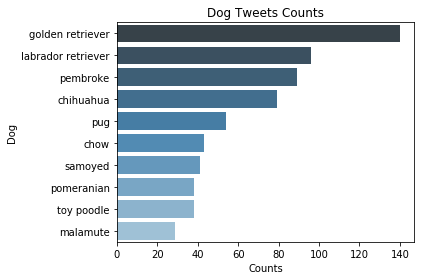

In [143]:
# Visuailze value counts via seaborn barplot
import seaborn as sns
sns_plot1 = sns.barplot(
    y = "Dog",
    x = "Counts",
    data = dog_tweets_counts,
    palette="Blues_d"
).set_title("Dog Tweets Counts");

# Save to file
plt.tight_layout()
sns_plot1.get_figure().savefig("plot1.png")

#### Insight 1: Dog breed with most tweets
Based on predictions with confidence level over 50%, the dog breed with most tweets are `golden retriever`, followed by `pembroke` and `labrador retriever`.

#### Exploration 2 : What are the relationships among rating, retweet counts, and favorite counts ?

Subseting the interested columns

In [144]:
# Subseting rating, retweet and favorite counts
df_2 = df[['rating', 'retweet_count', 'favorite_count']]
df_2.columns = ['Rating', 'Retweet Counts', 'Favorite Counts']

In [145]:
# Calculate Correlation coefficients among the variables
df_2.corr()

,Rating,Retweet Counts,Favorite Counts
Rating,1.000000,0.015573,0.014843
Retweet Counts,0.015573,1.000000,0.916267
Favorite Counts,0.014843,0.916267,1.000000


This table shows that the correlation coefficient between retweet counts and favorite counts are close to 1, whereas the correlation coefficients between rating and either retweet counts or favorite counts are very small.

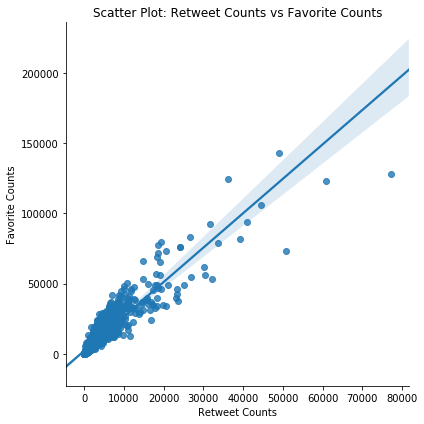

In [146]:
# Scatter plots of retweet counts and favorite counts
sns_plot2 = sns.lmplot(
    x = 'Retweet Counts',
    y = 'Favorite Counts',
    size= 6,
    data=df_2
)

# Set title
ax = plt.gca()
ax.set_title("Scatter Plot: Retweet Counts vs Favorite Counts");

# Save to file
plt.tight_layout()
sns_plot2.savefig("plot2.png")

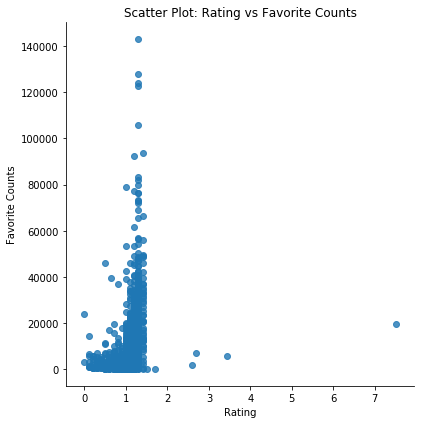

In [147]:
# Scatter plots of rating and favorite counts
sns_plot3 = sns.lmplot(
    x = 'Rating',
    y = 'Favorite Counts',
    data=df_2[df_2.Rating < 10],
    size = 6,
    fit_reg = False
);

# Set title
ax = plt.gca()
ax.set_title("Scatter Plot: Rating vs Favorite Counts");

# Save to file
plt.tight_layout()
sns_plot3.savefig("plot3.png")

#### Insight 2:  Relationships among rating, retweet counts, and favorite counts
Retweet counts and favorite counts exhibits strong positive linear relationships, whereas rating has weak relationships with either favorite counts or retweet counts.

#### Exploration 3 : What is main source of the dataset ?

In [148]:
# Aggregate the data source and save to a new data frame
source_counts = pd.DataFrame(
    [df.source.value_counts()[:10].index, df.source.value_counts()[:10].values]).transpose()

# Rename the columns
source_counts.columns = ["Source", "Counts"]
source_counts

,Source,Counts
0,iPhone,2051
1,Twitter Web Client,92
2,Vine,31
3,TweetDeck,11


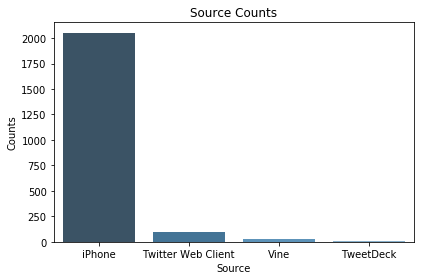

In [149]:
# Bar plot of source counts
sns_plot4 = sns.barplot(
    y = "Counts",
    x = "Source",
    data = source_counts,
    palette="Blues_d"
).set_title("Source Counts");

# Save to file
plt.tight_layout()
sns_plot4.get_figure().savefig("plot4.png")

#### Insight 3 : Main source of the dataset
Most user post their tweets via iPhone.

#### Exploration 4 : What is the most common stage of the dog tweets

In [150]:
df_4 = df[['prediction', 'stage']]

In [151]:
# Aggregate the data source and save to a new data frame
stage_counts = pd.DataFrame(
    [df_4.stage.value_counts()[:10].index, df_4.stage.value_counts()[:10].values]).transpose()

# Rename the columns
stage_counts.columns = ["Stage", "Counts"]
stage_counts

,Stage,Counts
0,pupper,225
1,doggo,75
2,puppo,25
3,"doggo, pupper",11
4,floofer,9
5,"doggo, puppo",1
6,"doggo, floofer",1


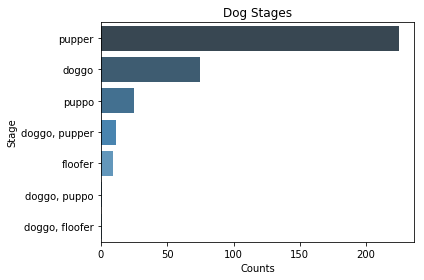

In [152]:
# Bar plot of stage counts
sns_plot5 = sns.barplot(
    y = "Stage",
    x = "Counts",
    data = stage_counts,
    palette="Blues_d"
).set_title("Dog Stages");

# Save to file
plt.tight_layout()
sns_plot5.get_figure().savefig("plot5.png")

#### Insight 4: Most common stage of the dog tweets

The most common stage of the tweets is `pupper`, which is a younger `doggo`  according to [WeRateDogs book on Amazon](https://www.amazon.com/WeRateDogs-Most-Hilarious-Adorable-Youve/dp/1510717145).